# DiploDatos 2019 - Análisis de Series Temporales

## Integrantes

| Nombre | e-mail |
|------|------|
|Rivadero, Isabel | isarivadero@hotmail.com |
|Vargas, Miguel | lvc0107@protonmail.com |
|Mancuso, Fernando | manquius@gmail.com |

## Práctico de Introducción al aprendizaje automático

En este práctico no introduciremos en las primeras herramientas de aprendizaje
automático. Diseñaremos e implementaremos algunos modelos simples y definir métricas
para ver como performan.

### Dataset

In [2]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(rc={'figure.figsize':(10,6)})

cols = ['service',
        'sender_zipcode',
        'receiver_zipcode',
        'sender_state',
        'receiver_state',
        'shipment_type',
        'quantity',
        'status',
        'date_created',
        'date_sent',
        'date_visit',
        'target']
cols_holidays = ['holiday', 
                 'description']
data_path = './shipments_BR_201903.csv'
holidays = './holidays.csv'

#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.


In [4]:
df = pd.read_csv(data_path, usecols=cols)
df.shape

(1000000, 12)

In [5]:
# set seed for reproducibility
np.random.seed(0)

**Eliminamos datos inconsistentes:**

Aplicamos curacion y limpieza de datos

In [8]:
df_clean = df[(df['date_sent'] <= df['date_visit']) & (df['date_created'] <= df['date_sent']) & (df['date_created'] <= df['date_visit'])].copy()
df.shape

(1000000, 12)

**Removemos outliers.**

In [9]:
df_clean = df_clean[df_clean['target'] < 23].copy()
df_clean.shape

(990370, 12)

####  Implementación
Solo vamos a diferenciar dos tipos de envíos:
​ rápidos: un envío es rápido si llega antes de 3 días hábiles 
​ y lentos: si llega después de 3 días hábiles.
Esto nos reduce los problemas de clasificación a solo 2 clases.


#### Definiciones básicas:
1- Definir una métrica binaria para evaluar los modelos



In [11]:
def dias_habiles(envio):
    # ACA ver si hay que filtrar los fin de seemanas y feriados
    int(envio['target'])

def metrica(envio):
    """
    1: Servicio rapido
    0: Servicio lento
    """
    return 1 if dias_habiles(envio) < 3 else 0 

2- Diseñar un modelo -baseline- para los envíos de SP a SP, como el modelo más
simple posible. Para esto no necesitamos machine learning, solo proponer una
heurística a partir de los datos observados en los prácticos de análisis


In [15]:
sp_sp = df_clean[(df_clean['sender_state'] == 'SP') & (df_clean['receiver_state'] == 'SP')]
sp_sp.head()

sender_state  sender_zipcode receiver_state  receiver_zipcode  \
0            SP            3005             SP              5409   
2            SP            2033             SP             11040   
3            SP           13900             SP             18500   
8            SP            2313             SP              4165   
10           SP           11015             SP             15025   

   shipment_type  quantity  service status         date_created  \
0        express         1        0   done  2019-03-04 00:00:00   
2        express         1        0   done  2019-02-18 00:00:00   
3        express         1        0   done  2019-03-09 00:00:00   
8        express         2        0   done  2019-02-28 00:00:00   
10       express         2        3   done  2019-02-24 00:00:00   

              date_sent           date_visit  target  
0   2019-03-05 13:24:00  2019-03-07 18:01:00       2  
2   2019-02-21 15:08:00  2019-02-28 18:19:00       5  
3   2019-03-11 15:48:00  2019-03-12 13:33:00       1  
8   2019-03-01 14:35:00  2019-03-04 14:22:00       1  
10  2019-03-04 23:54:00  2019-03-11 22:00:00       4

In [21]:
sp_sp.shape

(278081, 12)

In [24]:
# but it couldn be useful for you depending on your approach)
from sklearn.model_selection import train_test_split


# División entre instancias y etiquetas
X = sp_sp.drop('target', axis=1)
y = sp_sp['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.head()

sender_state  sender_zipcode receiver_state  receiver_zipcode  \
776089           SP           18010             SP              5712   
383341           SP           18150             SP              6775   
893527           SP            6422             SP             16290   
746617           SP            6622             SP             11740   
696614           SP           13324             SP              5763   

       shipment_type  quantity  service status         date_created  \
776089       express         1        0   done  2019-03-19 00:00:00   
383341      standard         2        1   done  2019-03-06 00:00:00   
893527       express         1        0   done  2019-03-11 00:00:00   
746617      standard         1        1   done  2019-03-04 00:00:00   
696614       express         1        0   done  2019-03-24 00:00:00   

                  date_sent           date_visit  
776089  2019-03-20 17:03:00  2019-03-22 12:05:00  
383341  2019-03-07 14:17:00  2019-03-16 10:35:00  
893527  2019-03-13 00:09:27  2019-03-18 15:41:00  
746617  2019-03-06 10:53:00  2019-03-12 12:32:00  
696614  2019-03-25 14:37:00  2019-03-26 18:42:00

In [26]:
X_train.shape

(222464, 11)

In [27]:
y_train.head()

776089    2
383341    6
893527    3
746617    3
696614    1
Name: target, dtype: int64

In [23]:
y_train.shape

(222464,)

In [28]:
X_test.head()

sender_state  sender_zipcode receiver_state  receiver_zipcode  \
68262            SP           15800             SP             13304   
269933           SP           12232             SP             12237   
206944           SP            1009             SP              6852   
422707           SP            9890             SP             13974   
415678           SP            4764             SP             13940   

       shipment_type  quantity  service status         date_created  \
68262        express         1        0   done  2019-03-04 00:00:00   
269933       express         1        0   done  2019-03-07 00:00:00   
206944       express         1        0   done  2019-02-24 00:00:00   
422707      standard         1        3   done  2019-03-04 00:00:00   
415678      standard         1        2   done  2019-02-21 00:00:00   

                  date_sent           date_visit  
68262   2019-03-07 19:15:30  2019-03-11 17:36:00  
269933  2019-03-08 15:40:00  2019-03-11 12:40:00  
206944  2019-02-25 11:13:00  2019-03-06 12:40:00  
422707  2019-03-07 04:32:00  2019-03-12 14:00:00  
415678  2019-02-26 23:24:11  2019-02-28 12:24:00

In [29]:
X_test.shape

(55617, 11)

In [ ]:
X_test.head()

3- Calcular la métrica y la matriz de confusión para el baseline

#### Preparación de los features:
4- Con la intención de salvar las rutas poco representadas, implementar una codificación para los features:  sender_zipcode y  receiver_zipcode



5- Seleccionar un conjunto de features para entrenar modelos de machine learning

#### Clustering:
6- Clusterizar los envíos basados únicamente en las rutas. Para esto recomiendo utilizar KMeans


7- (*) Cual es el número óptimo de clusters? (Ver método de ​ Elbow​ con KMeans)


In [25]:
 kmeanModel.fit(X).cluster_centers_

array([[8.42595567e+03, 1.07689477e+04, 1.23940125e+00],
       [8.85899313e+03, 6.51141810e+04, 1.33904343e+00],
       [8.49978280e+04, 1.28010698e+04, 7.97744656e-01],
       [8.55179419e+04, 8.33480034e+04, 7.19926756e-01],
       [3.29966632e+04, 2.39299170e+04, 6.51350398e-01],
       [8.75184861e+03, 3.50700816e+04, 1.39412491e+00],
       [8.78903392e+03, 8.79461998e+04, 1.38117638e+00],
       [8.38386687e+04, 4.17150809e+04, 9.38893348e-01],
       [3.60355042e+04, 7.70477440e+04, 9.09323186e-01]])

In [24]:
KMeans(n_clusters=k).fit(X).cluster_centers_

array([[8.55182515e+04, 8.33143770e+04, 7.20237692e-01],
       [8.41969892e+03, 1.07789333e+04, 1.23925588e+00],
       [8.84435674e+03, 6.51602317e+04, 1.33807573e+00],
       [8.49944952e+04, 1.27504627e+04, 7.97315648e-01],
       [8.76602021e+03, 3.50946594e+04, 1.39455269e+00],
       [8.38848402e+04, 4.15744592e+04, 9.39322586e-01],
       [8.80369636e+03, 8.79665361e+04, 1.38153312e+00],
       [3.61138449e+04, 7.69602121e+04, 9.09335727e-01],
       [3.29936037e+04, 2.39154867e+04, 6.51287175e-01]])

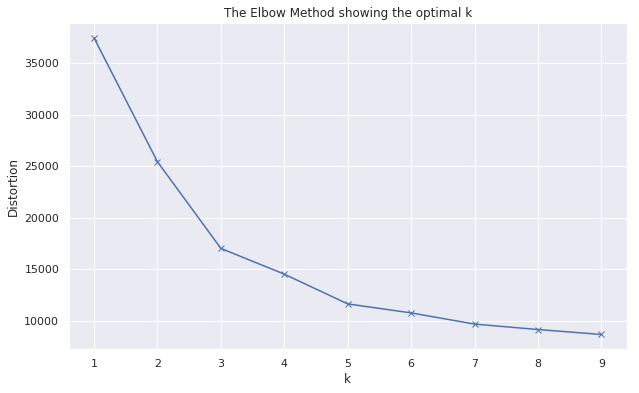

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# create new plot and data
plt.plot()
X = df[['sender_zipcode', 'receiver_zipcode', 'service']]
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


8- Describir brevemente las características interesante de los clusters


#### Modelos lineales:
9- Leer sobre accuracy, precision y recall para agregarlas al pool de métricas que vamos a utilizar.


10- Implementar un modelo basado en regresión lineal, calcular las métricas y la matriz de confusión


11- Implementar un modelo basado en regresión logística, calcular las métricas y la matriz de confusión


12- Cual es la principal diferencia entre estos modelos? Tuviste que hacer algún tipo de post-procesamiento?


13- Estandarizar los features seleccionados y re entrenar los modelos. Las métricas
mejoran? Explicar por qué.
